In [92]:
import sys
from collections import defaultdict
import matplotlib.pyplot as plt
from learning_models import ParameterOptimizer, ModelRunner, models
from modified_mouselab import reward_val, normal_reward_val
from learning_utils import string_to_bool, pickle_load, pickle_save, \
    get_normalized_features, Participant, create_dir, rows_mean
from sequence_utils import get_termination_mers
import pyabc
import logging
import itertools
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
#models = [0, 1, 64, 65, 576, 577, 640, 641, 1728, 1729, 1824, 1825, 2020, 2021, 2022, 2023]
models = list(range(3216))
control_pids = [1, 2, 6, 9, 11, 14, 18, 21, 24, 27, 37, 38, 44, 50, 55, 56, 58, 66, 76, 79, 85, 89, 90, 98, 99,
                100, 104, 111, 113, 118, 119, 123, 126, 129, 139, 142, 144, 153, 154]
obj = "mer_performance_error"
for model in models[:1]:
    print(model)
    data = pd.DataFrame()
    for pid in control_pids[:1]:
        try:
            d = pickle_load(f"results/model_performance_error/{pid}_{obj}_{model}.pkl")
            data = data.append(d, ignore_index=True)
            print(d)
        except Exception as e:
            print(e)
            continue
    #plt.figure()
    #ax = sns.lineplot(x="x", y="y", hue = "algo", data=data)
    #plt.title(model)
    #plt.legend()
    #plt.savefig(f"results/model_plots/{model}.png")
    #plt.close()

0
      x     y         algo
0     1  48.0         algo
1     2  48.0         algo
2     3  24.0         algo
3     4  24.0         algo
4     5  48.0         algo
..   ..   ...          ...
325  26  52.0  participant
326  27  52.0  participant
327  28  48.0  participant
328  29  48.0  participant
329  30  24.0  participant

[330 rows x 3 columns]


1
2
6
cannot concatenate object of type '<class 'numpy.float64'>'; only Series and DataFrame objs are valid
cannot concatenate object of type '<class 'numpy.float64'>'; only Series and DataFrame objs are valid
cannot concatenate object of type '<class 'numpy.float64'>'; only Series and DataFrame objs are valid
cannot concatenate object of type '<class 'numpy.float64'>'; only Series and DataFrame objs are valid
cannot concatenate object of type '<class 'numpy.float64'>'; only Series and DataFrame objs are valid
cannot concatenate object of type '<class 'numpy.float64'>'; only Series and DataFrame objs are valid
cannot concatenate object of type '<class 'numpy.float64'>'; only Series and DataFrame objs are valid
cannot concatenate object of type '<class 'numpy.float64'>'; only Series and DataFrame objs are valid
cannot concatenate object of type '<class 'numpy.float64'>'; only Series and DataFrame objs are valid
cannot concatenate object of type '<class 'numpy.float64'>'; only Series and

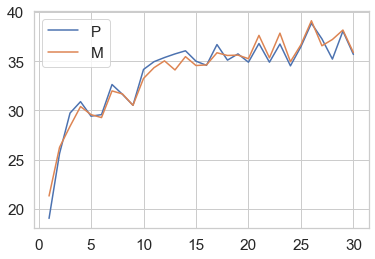

In [94]:
models = list(range(3216))
control_pids = [1, 2, 6, 9, 11, 14, 18, 21, 24, 27, 37, 38, 44, 50, 55, 56, 58, 66, 76, 79, 85, 89, 90, 98, 99,
                100, 104, 111, 113, 118, 119, 123, 126, 129, 139, 142, 144, 153, 154]
n_trials = 30
obj = "mer_performance_error"
p_vals = []
m_vals = []
n_trials = 30
for i, pid in enumerate(control_pids):
    print(pid)
    data = pd.DataFrame()
    m_data = {}
    diffs = []
    j = 0
    for model in models:
        try:
            d = pickle_load(f"results/model_performance_error/{pid}_{obj}_{model}.pkl")
            data = data.append(d, ignore_index=True)
            mean_data = d.groupby(["algo", "x"]).mean()
            square = list(map(lambda x, y: (x-y)**2, mean_data['y']['algo'], mean_data['y']['participant']))
            p_val = mean_data['y']['participant'].values
            diff = np.sqrt(np.sum(square))
            diffs.append(diff)
            m_data[j] = mean_data
            j+=1
        except Exception as e:
            print(e)
            continue
    m_val = m_data[np.argmin(diffs)]["y"]["algo"].values
    if len(p_val) == n_trials and len(m_val) == n_trials:
        p_vals.append(p_val)
        m_vals.append(m_val)
#ax = sns.lineplot(x="x", y="y", hue = "algo", data=data)
plt.plot(range(1, len(p_val)+1), np.mean(p_vals, axis=0), label = "P") 
plt.plot(range(1, len(p_val)+1), np.mean(m_vals, axis=0), label = "M") 
plt.legend()
plt.show()

In [93]:
from scipy.stats import norm
models = list(range(3216))
control_pids = [1, 2, 6, 9, 11, 14, 18, 21, 24, 27, 37, 38, 44, 50, 55, 56, 58, 66, 76, 79, 85, 89, 90, 98, 99,
                100, 104, 111, 113, 118, 119, 123, 126, 129, 139, 142, 144, 153, 154]
obj = "mer_performance_error"
sigma = 1
nlls = defaultdict(dict)
diffs = defaultdict(dict)
for i, pid in enumerate(control_pids):
    print(pid)
    data = pd.DataFrame()
    for model in models:
        try:
            d = pickle_load(f"results/model_performance_error/{pid}_{obj}_{model}.pkl")
            mean_data = d.groupby(["algo", "x"]).mean()
            algo_mean = mean_data['y']['algo'].values
            p_data = mean_data['y']['participant'].values
            diffs[pid][model] = np.sqrt(np.sum(algo_mean-p_data)**2)
            nlls[pid][model] = np.sum([-norm.logpdf(a_score, p_score, sigma) for a_score, p_score in zip(algo_mean, p_data)])
        except Exception as e:
            print(e)
            continue

1


KeyboardInterrupt: 

In [83]:
M = pd.read_csv("rl_models.csv")

In [87]:
control_pids = [1, 2, 6, 9, 11, 14, 18, 21, 24, 27, 37, 38, 44, 50, 55, 56, 58, 66, 76, 79, 85, 89, 90, 98, 99,
                100, 104, 111, 113, 118, 119, 123, 126, 129, 139, 142, 144, 153, 154]

{1: [1872, 2006], 2: [364, 478, 1814, 1892, 1907, 1939, 1950, 1969], 6: [1833], 9: [1108], 11: [641], 14: [9], 18: [1959], 21: [1059], 24: [1873], 27: [1899], 37: [645], 38: [1997], 44: [711], 50: [1893, 2001], 55: [1860, 1954], 56: [901], 58: [1948], 66: [4, 11, 14, 64, 75, 80, 84, 85, 95, 134, 136, 139, 150, 154, 158, 163, 277, 289, 319, 321, 334, 335, 342, 356, 374, 457, 465, 466, 468, 469, 493, 494, 521, 534, 538, 539, 541, 560, 644, 647, 654, 657, 658, 660, 669, 670, 705, 706, 708, 711, 713, 717, 718, 838, 842, 844, 845, 850, 854, 859, 860, 862, 901, 903, 905, 909, 915, 916, 922, 923, 927, 1028, 1029, 1037, 1038, 1040, 1041, 1045, 1053, 1055, 1091, 1093, 1095, 1111, 1113, 1117, 1118, 1732, 1736, 1738, 1754, 1756, 1762, 1774, 1777, 1779, 1798, 1800, 1808, 1812, 1824, 1826, 1828, 1830, 1831, 1833, 1834, 1835, 1836, 1837, 1838, 1840, 1842, 1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855, 1858, 1859, 1860, 1862, 1864, 1866, 1869, 1870, 1871, 1872, 1875, 1876, 1878, 18

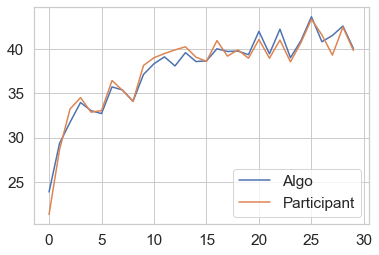

In [88]:
import operator

mod_control_pids = control_pids.copy()
for p in [79, 113, 126, 129]:
    mod_control_pids.remove(p)

algos = []
ps = []
def key_with_min_val(d):
    return min(d.items(), key=operator.itemgetter(1))[0]

def get_keys_with_min_aic(d):
    min_aic = min(d.values())
    min_indices = [i for i, aic in d.items() if aic <= min_aic + 2]
    return min_indices

n_trials=30
indices = {}
for pid in mod_control_pids:
    d = nlls[pid]
    min_key = key_with_min_val(d)
    indices[pid] = get_keys_with_min_aic(d)
    d = pickle_load(f"results/model_performance_error/{pid}_{obj}_{min_key}.pkl")
    mean_data = d.groupby(["algo", "x"]).mean()
    algo_mean = mean_data['y']['algo'].values
    p_data = mean_data['y']['participant'].values
    if len(algo_mean) == n_trials:
        algos.append(algo_mean)
        ps.append(p_data)
        #print(pid, M.iloc[min_key])
print(indices)
plt.plot(np.mean(algos, axis=0), label='Algo')
plt.plot(np.mean(ps, axis=0), label='Participant')
plt.legend()
plt.savefig("results/best_models.png")

In [91]:
for pid in mod_control_pids:
    print(pid)
    display(M.iloc[indices[pid]])
from IPython.display import FileLink
FileLink('best_models.md')

1


,Unnamed: 0,model,decision_rule,use_pseudo_rewards,pr_weight,actor,term,selector,learner,strategy_space_type,stochastic_updating,subjective_cost,vicarious_learning,termination_value_known,montecarlo_updates,is_null,is_gaussian,bandit_prior,prior
1872,1872,reinforce,NaN,True,False,NaN,True,NaN,NaN,NaN,NaN,False,True,True,True,True,NaN,NaN,strategy_weight
2006,2006,baseline_reinforce,NaN,False,False,NaN,True,NaN,NaN,NaN,NaN,False,True,False,False,True,NaN,NaN,strategy_weight


2


,Unnamed: 0,model,decision_rule,use_pseudo_rewards,pr_weight,actor,term,selector,learner,strategy_space_type,stochastic_updating,subjective_cost,vicarious_learning,termination_value_known,montecarlo_updates,is_null,is_gaussian,bandit_prior,prior
364,364,hierarchical_learner,adaptive_satisficing,True,False,baseline_reinforce,False,NaN,NaN,NaN,NaN,True,False,False,True,True,NaN,NaN,strategy_weight
478,478,hierarchical_learner,adaptive_satisficing,False,False,reinforce,True,NaN,NaN,NaN,NaN,False,False,False,False,True,NaN,NaN,strategy_weight
1814,1814,lvoc,NaN,False,False,NaN,True,NaN,NaN,NaN,NaN,False,True,False,False,True,NaN,NaN,strategy_weight
1892,1892,reinforce,NaN,False,False,NaN,True,NaN,NaN,NaN,NaN,True,True,False,True,True,NaN,NaN,strategy_weight
1907,1907,reinforce,NaN,False,False,NaN,True,NaN,NaN,NaN,NaN,False,True,True,False,False,NaN,NaN,strategy_weight
1939,1939,baseline_reinforce,NaN,True,True,NaN,True,NaN,NaN,NaN,NaN,False,True,True,False,False,NaN,NaN,strategy_weight
1950,1950,baseline_reinforce,NaN,True,True,NaN,True,NaN,NaN,NaN,NaN,False,False,False,False,True,NaN,NaN,strategy_weight
1969,1969,baseline_reinforce,NaN,True,False,NaN,True,NaN,NaN,NaN,NaN,False,True,True,True,False,NaN,NaN,strategy_weight


6


,Unnamed: 0,model,decision_rule,use_pseudo_rewards,pr_weight,actor,term,selector,learner,strategy_space_type,stochastic_updating,subjective_cost,vicarious_learning,termination_value_known,montecarlo_updates,is_null,is_gaussian,bandit_prior,prior
1833,1833,reinforce,NaN,True,True,NaN,True,NaN,NaN,NaN,NaN,True,False,True,True,False,NaN,NaN,strategy_weight


9


,Unnamed: 0,model,decision_rule,use_pseudo_rewards,pr_weight,actor,term,selector,learner,strategy_space_type,stochastic_updating,subjective_cost,vicarious_learning,termination_value_known,montecarlo_updates,is_null,is_gaussian,bandit_prior,prior
1108,1108,hierarchical_learner,threshold,False,False,baseline_reinforce,True,NaN,NaN,NaN,NaN,False,True,False,True,True,NaN,NaN,strategy_weight


11


,Unnamed: 0,model,decision_rule,use_pseudo_rewards,pr_weight,actor,term,selector,learner,strategy_space_type,stochastic_updating,subjective_cost,vicarious_learning,termination_value_known,montecarlo_updates,is_null,is_gaussian,bandit_prior,prior
641,641,hierarchical_learner,threshold,True,True,reinforce,True,NaN,NaN,NaN,NaN,True,True,True,True,False,NaN,NaN,strategy_weight


14


,Unnamed: 0,model,decision_rule,use_pseudo_rewards,pr_weight,actor,term,selector,learner,strategy_space_type,stochastic_updating,subjective_cost,vicarious_learning,termination_value_known,montecarlo_updates,is_null,is_gaussian,bandit_prior,prior
9,9,hierarchical_learner,adaptive_satisficing,True,True,lvoc,True,NaN,NaN,NaN,NaN,True,False,True,True,False,NaN,NaN,strategy_weight


18


,Unnamed: 0,model,decision_rule,use_pseudo_rewards,pr_weight,actor,term,selector,learner,strategy_space_type,stochastic_updating,subjective_cost,vicarious_learning,termination_value_known,montecarlo_updates,is_null,is_gaussian,bandit_prior,prior
1959,1959,baseline_reinforce,NaN,True,False,NaN,True,NaN,NaN,NaN,NaN,True,True,False,False,False,NaN,NaN,strategy_weight


21


,Unnamed: 0,model,decision_rule,use_pseudo_rewards,pr_weight,actor,term,selector,learner,strategy_space_type,stochastic_updating,subjective_cost,vicarious_learning,termination_value_known,montecarlo_updates,is_null,is_gaussian,bandit_prior,prior
1059,1059,hierarchical_learner,threshold,False,False,reinforce,False,NaN,NaN,NaN,NaN,True,True,True,False,False,NaN,NaN,strategy_weight


24


,Unnamed: 0,model,decision_rule,use_pseudo_rewards,pr_weight,actor,term,selector,learner,strategy_space_type,stochastic_updating,subjective_cost,vicarious_learning,termination_value_known,montecarlo_updates,is_null,is_gaussian,bandit_prior,prior
1873,1873,reinforce,NaN,True,False,NaN,True,NaN,NaN,NaN,NaN,False,True,True,True,False,NaN,NaN,strategy_weight


27


,Unnamed: 0,model,decision_rule,use_pseudo_rewards,pr_weight,actor,term,selector,learner,strategy_space_type,stochastic_updating,subjective_cost,vicarious_learning,termination_value_known,montecarlo_updates,is_null,is_gaussian,bandit_prior,prior
1899,1899,reinforce,NaN,False,False,NaN,True,NaN,NaN,NaN,NaN,True,False,True,False,False,NaN,NaN,strategy_weight


37


,Unnamed: 0,model,decision_rule,use_pseudo_rewards,pr_weight,actor,term,selector,learner,strategy_space_type,stochastic_updating,subjective_cost,vicarious_learning,termination_value_known,montecarlo_updates,is_null,is_gaussian,bandit_prior,prior
645,645,hierarchical_learner,threshold,True,True,reinforce,True,NaN,NaN,NaN,NaN,True,True,False,True,False,NaN,NaN,strategy_weight


38


,Unnamed: 0,model,decision_rule,use_pseudo_rewards,pr_weight,actor,term,selector,learner,strategy_space_type,stochastic_updating,subjective_cost,vicarious_learning,termination_value_known,montecarlo_updates,is_null,is_gaussian,bandit_prior,prior
1997,1997,baseline_reinforce,NaN,False,False,NaN,True,NaN,NaN,NaN,NaN,True,False,False,True,False,NaN,NaN,strategy_weight


44


,Unnamed: 0,model,decision_rule,use_pseudo_rewards,pr_weight,actor,term,selector,learner,strategy_space_type,stochastic_updating,subjective_cost,vicarious_learning,termination_value_known,montecarlo_updates,is_null,is_gaussian,bandit_prior,prior
711,711,hierarchical_learner,threshold,True,True,baseline_reinforce,True,NaN,NaN,NaN,NaN,True,True,False,False,False,NaN,NaN,strategy_weight


50


,Unnamed: 0,model,decision_rule,use_pseudo_rewards,pr_weight,actor,term,selector,learner,strategy_space_type,stochastic_updating,subjective_cost,vicarious_learning,termination_value_known,montecarlo_updates,is_null,is_gaussian,bandit_prior,prior
1893,1893,reinforce,NaN,False,False,NaN,True,NaN,NaN,NaN,NaN,True,True,False,True,False,NaN,NaN,strategy_weight
2001,2001,baseline_reinforce,NaN,False,False,NaN,True,NaN,NaN,NaN,NaN,False,True,True,True,False,NaN,NaN,strategy_weight


55


,Unnamed: 0,model,decision_rule,use_pseudo_rewards,pr_weight,actor,term,selector,learner,strategy_space_type,stochastic_updating,subjective_cost,vicarious_learning,termination_value_known,montecarlo_updates,is_null,is_gaussian,bandit_prior,prior
1860,1860,reinforce,NaN,True,False,NaN,True,NaN,NaN,NaN,NaN,True,True,False,True,True,NaN,NaN,strategy_weight
1954,1954,baseline_reinforce,NaN,True,False,NaN,True,NaN,NaN,NaN,NaN,True,True,True,False,True,NaN,NaN,strategy_weight


56


,Unnamed: 0,model,decision_rule,use_pseudo_rewards,pr_weight,actor,term,selector,learner,strategy_space_type,stochastic_updating,subjective_cost,vicarious_learning,termination_value_known,montecarlo_updates,is_null,is_gaussian,bandit_prior,prior
901,901,hierarchical_learner,threshold,True,False,baseline_reinforce,True,NaN,NaN,NaN,NaN,True,True,False,True,False,NaN,NaN,strategy_weight


58


,Unnamed: 0,model,decision_rule,use_pseudo_rewards,pr_weight,actor,term,selector,learner,strategy_space_type,stochastic_updating,subjective_cost,vicarious_learning,termination_value_known,montecarlo_updates,is_null,is_gaussian,bandit_prior,prior
1948,1948,baseline_reinforce,NaN,True,True,NaN,True,NaN,NaN,NaN,NaN,False,False,False,True,True,NaN,NaN,strategy_weight


66


,Unnamed: 0,model,decision_rule,use_pseudo_rewards,pr_weight,actor,term,selector,learner,strategy_space_type,stochastic_updating,subjective_cost,vicarious_learning,termination_value_known,montecarlo_updates,is_null,is_gaussian,bandit_prior,prior
4,4,hierarchical_learner,adaptive_satisficing,True,True,lvoc,True,NaN,NaN,NaN,NaN,True,True,False,True,True,NaN,NaN,strategy_weight
11,11,hierarchical_learner,adaptive_satisficing,True,True,lvoc,True,NaN,NaN,NaN,NaN,True,False,True,False,False,NaN,NaN,strategy_weight
14,14,hierarchical_learner,adaptive_satisficing,True,True,lvoc,True,NaN,NaN,NaN,NaN,True,False,False,False,True,NaN,NaN,strategy_weight
64,64,hierarchical_learner,adaptive_satisficing,True,True,reinforce,True,NaN,NaN,NaN,NaN,True,True,True,True,True,NaN,NaN,strategy_weight
75,75,hierarchical_learner,adaptive_satisficing,True,True,reinforce,True,NaN,NaN,NaN,NaN,True,False,True,False,False,NaN,NaN,strategy_weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2444,2444,sdss,NaN,True,True,NaN,True,rssl,baseline_reinforce,NaN,False,False,False,False,False,True,True,True,strategy_weight
2587,2587,sdss,NaN,True,False,NaN,True,rssl,reinforce,NaN,True,True,True,False,True,False,False,True,strategy_weight
2764,2764,sdss,NaN,True,False,NaN,True,rssl,baseline_reinforce,NaN,True,False,False,False,False,True,True,True,strategy_weight
2827,2827,sdss,NaN,True,False,NaN,True,rssl,baseline_reinforce,NaN,False,False,False,False,True,False,False,True,strategy_weight


76


,Unnamed: 0,model,decision_rule,use_pseudo_rewards,pr_weight,actor,term,selector,learner,strategy_space_type,stochastic_updating,subjective_cost,vicarious_learning,termination_value_known,montecarlo_updates,is_null,is_gaussian,bandit_prior,prior
919,919,hierarchical_learner,threshold,True,False,baseline_reinforce,True,NaN,NaN,NaN,NaN,False,True,False,False,False,NaN,NaN,strategy_weight
1838,1838,reinforce,NaN,True,True,NaN,True,NaN,NaN,NaN,NaN,True,False,False,False,True,NaN,NaN,strategy_weight
1879,1879,reinforce,NaN,True,False,NaN,True,NaN,NaN,NaN,NaN,False,True,False,False,False,NaN,NaN,strategy_weight
1995,1995,baseline_reinforce,NaN,False,False,NaN,True,NaN,NaN,NaN,NaN,True,False,True,False,False,NaN,NaN,strategy_weight
2002,2002,baseline_reinforce,NaN,False,False,NaN,True,NaN,NaN,NaN,NaN,False,True,True,False,True,NaN,NaN,strategy_weight


85


,Unnamed: 0,model,decision_rule,use_pseudo_rewards,pr_weight,actor,term,selector,learner,strategy_space_type,stochastic_updating,subjective_cost,vicarious_learning,termination_value_known,montecarlo_updates,is_null,is_gaussian,bandit_prior,prior
1929,1929,baseline_reinforce,NaN,True,True,NaN,True,NaN,NaN,NaN,NaN,True,False,True,True,False,NaN,NaN,strategy_weight


89


,Unnamed: 0,model,decision_rule,use_pseudo_rewards,pr_weight,actor,term,selector,learner,strategy_space_type,stochastic_updating,subjective_cost,vicarious_learning,termination_value_known,montecarlo_updates,is_null,is_gaussian,bandit_prior,prior
1909,1909,reinforce,NaN,False,False,NaN,True,NaN,NaN,NaN,NaN,False,True,False,True,False,NaN,NaN,strategy_weight


90


,Unnamed: 0,model,decision_rule,use_pseudo_rewards,pr_weight,actor,term,selector,learner,strategy_space_type,stochastic_updating,subjective_cost,vicarious_learning,termination_value_known,montecarlo_updates,is_null,is_gaussian,bandit_prior,prior
1940,1940,baseline_reinforce,NaN,True,True,NaN,True,NaN,NaN,NaN,NaN,False,True,False,True,True,NaN,NaN,strategy_weight


98


,Unnamed: 0,model,decision_rule,use_pseudo_rewards,pr_weight,actor,term,selector,learner,strategy_space_type,stochastic_updating,subjective_cost,vicarious_learning,termination_value_known,montecarlo_updates,is_null,is_gaussian,bandit_prior,prior
1902,1902,reinforce,NaN,False,False,NaN,True,NaN,NaN,NaN,NaN,True,False,False,False,True,NaN,NaN,strategy_weight


99


,Unnamed: 0,model,decision_rule,use_pseudo_rewards,pr_weight,actor,term,selector,learner,strategy_space_type,stochastic_updating,subjective_cost,vicarious_learning,termination_value_known,montecarlo_updates,is_null,is_gaussian,bandit_prior,prior
1780,1780,lvoc,NaN,True,False,NaN,True,NaN,NaN,NaN,NaN,False,True,False,True,True,NaN,NaN,strategy_weight


100


,Unnamed: 0,model,decision_rule,use_pseudo_rewards,pr_weight,actor,term,selector,learner,strategy_space_type,stochastic_updating,subjective_cost,vicarious_learning,termination_value_known,montecarlo_updates,is_null,is_gaussian,bandit_prior,prior
323,323,hierarchical_learner,adaptive_satisficing,True,False,baseline_reinforce,True,NaN,NaN,NaN,NaN,True,True,True,False,False,NaN,NaN,strategy_weight


104


,Unnamed: 0,model,decision_rule,use_pseudo_rewards,pr_weight,actor,term,selector,learner,strategy_space_type,stochastic_updating,subjective_cost,vicarious_learning,termination_value_known,montecarlo_updates,is_null,is_gaussian,bandit_prior,prior
1998,1998,baseline_reinforce,NaN,False,False,NaN,True,NaN,NaN,NaN,NaN,True,False,False,False,True,NaN,NaN,strategy_weight


111


,Unnamed: 0,model,decision_rule,use_pseudo_rewards,pr_weight,actor,term,selector,learner,strategy_space_type,stochastic_updating,subjective_cost,vicarious_learning,termination_value_known,montecarlo_updates,is_null,is_gaussian,bandit_prior,prior
1955,1955,baseline_reinforce,NaN,True,False,NaN,True,NaN,NaN,NaN,NaN,True,True,True,False,False,NaN,NaN,strategy_weight


118


,Unnamed: 0,model,decision_rule,use_pseudo_rewards,pr_weight,actor,term,selector,learner,strategy_space_type,stochastic_updating,subjective_cost,vicarious_learning,termination_value_known,montecarlo_updates,is_null,is_gaussian,bandit_prior,prior
1035,1035,hierarchical_learner,threshold,False,False,reinforce,True,NaN,NaN,NaN,NaN,True,False,True,False,False,NaN,NaN,strategy_weight


119


,Unnamed: 0,model,decision_rule,use_pseudo_rewards,pr_weight,actor,term,selector,learner,strategy_space_type,stochastic_updating,subjective_cost,vicarious_learning,termination_value_known,montecarlo_updates,is_null,is_gaussian,bandit_prior,prior
842,842,hierarchical_learner,threshold,True,False,reinforce,True,NaN,NaN,NaN,NaN,True,False,True,False,True,NaN,NaN,strategy_weight
898,898,hierarchical_learner,threshold,True,False,baseline_reinforce,True,NaN,NaN,NaN,NaN,True,True,True,False,True,NaN,NaN,strategy_weight
1830,1830,reinforce,NaN,True,True,NaN,True,NaN,NaN,NaN,NaN,True,True,False,False,True,NaN,NaN,strategy_weight
1877,1877,reinforce,NaN,True,False,NaN,True,NaN,NaN,NaN,NaN,False,True,False,True,False,NaN,NaN,strategy_weight
1892,1892,reinforce,NaN,False,False,NaN,True,NaN,NaN,NaN,NaN,True,True,False,True,True,NaN,NaN,strategy_weight
1949,1949,baseline_reinforce,NaN,True,True,NaN,True,NaN,NaN,NaN,NaN,False,False,False,True,False,NaN,NaN,strategy_weight
1952,1952,baseline_reinforce,NaN,True,False,NaN,True,NaN,NaN,NaN,NaN,True,True,True,True,True,NaN,NaN,strategy_weight
1979,1979,baseline_reinforce,NaN,True,False,NaN,True,NaN,NaN,NaN,NaN,False,False,True,False,False,NaN,NaN,strategy_weight
1980,1980,baseline_reinforce,NaN,True,False,NaN,True,NaN,NaN,NaN,NaN,False,False,False,True,True,NaN,NaN,strategy_weight
1996,1996,baseline_reinforce,NaN,False,False,NaN,True,NaN,NaN,NaN,NaN,True,False,False,True,True,NaN,NaN,strategy_weight


123


,Unnamed: 0,model,decision_rule,use_pseudo_rewards,pr_weight,actor,term,selector,learner,strategy_space_type,stochastic_updating,subjective_cost,vicarious_learning,termination_value_known,montecarlo_updates,is_null,is_gaussian,bandit_prior,prior
1892,1892,reinforce,NaN,False,False,NaN,True,NaN,NaN,NaN,NaN,True,True,False,True,True,NaN,NaN,strategy_weight


139


,Unnamed: 0,model,decision_rule,use_pseudo_rewards,pr_weight,actor,term,selector,learner,strategy_space_type,stochastic_updating,subjective_cost,vicarious_learning,termination_value_known,montecarlo_updates,is_null,is_gaussian,bandit_prior,prior
1755,1755,lvoc,NaN,True,True,NaN,True,NaN,NaN,NaN,NaN,False,False,True,False,False,NaN,NaN,strategy_weight


142


,Unnamed: 0,model,decision_rule,use_pseudo_rewards,pr_weight,actor,term,selector,learner,strategy_space_type,stochastic_updating,subjective_cost,vicarious_learning,termination_value_known,montecarlo_updates,is_null,is_gaussian,bandit_prior,prior
1829,1829,reinforce,NaN,True,True,NaN,True,NaN,NaN,NaN,NaN,True,True,False,True,False,NaN,NaN,strategy_weight
1845,1845,reinforce,NaN,True,True,NaN,True,NaN,NaN,NaN,NaN,False,True,False,True,False,NaN,NaN,strategy_weight
1860,1860,reinforce,NaN,True,False,NaN,True,NaN,NaN,NaN,NaN,True,True,False,True,True,NaN,NaN,strategy_weight
1870,1870,reinforce,NaN,True,False,NaN,True,NaN,NaN,NaN,NaN,True,False,False,False,True,NaN,NaN,strategy_weight
1871,1871,reinforce,NaN,True,False,NaN,True,NaN,NaN,NaN,NaN,True,False,False,False,False,NaN,NaN,strategy_weight
1930,1930,baseline_reinforce,NaN,True,True,NaN,True,NaN,NaN,NaN,NaN,True,False,True,False,True,NaN,NaN,strategy_weight
1931,1931,baseline_reinforce,NaN,True,True,NaN,True,NaN,NaN,NaN,NaN,True,False,True,False,False,NaN,NaN,strategy_weight
1965,1965,baseline_reinforce,NaN,True,False,NaN,True,NaN,NaN,NaN,NaN,True,False,False,True,False,NaN,NaN,strategy_weight
1970,1970,baseline_reinforce,NaN,True,False,NaN,True,NaN,NaN,NaN,NaN,False,True,True,False,True,NaN,NaN,strategy_weight
1973,1973,baseline_reinforce,NaN,True,False,NaN,True,NaN,NaN,NaN,NaN,False,True,False,True,False,NaN,NaN,strategy_weight


144


,Unnamed: 0,model,decision_rule,use_pseudo_rewards,pr_weight,actor,term,selector,learner,strategy_space_type,stochastic_updating,subjective_cost,vicarious_learning,termination_value_known,montecarlo_updates,is_null,is_gaussian,bandit_prior,prior
469,469,hierarchical_learner,adaptive_satisficing,False,False,reinforce,True,NaN,NaN,NaN,NaN,False,True,False,True,False,NaN,NaN,strategy_weight


153


,Unnamed: 0,model,decision_rule,use_pseudo_rewards,pr_weight,actor,term,selector,learner,strategy_space_type,stochastic_updating,subjective_cost,vicarious_learning,termination_value_known,montecarlo_updates,is_null,is_gaussian,bandit_prior,prior
1879,1879,reinforce,NaN,True,False,NaN,True,NaN,NaN,NaN,NaN,False,True,False,False,False,NaN,NaN,strategy_weight


154


,Unnamed: 0,model,decision_rule,use_pseudo_rewards,pr_weight,actor,term,selector,learner,strategy_space_type,stochastic_updating,subjective_cost,vicarious_learning,termination_value_known,montecarlo_updates,is_null,is_gaussian,bandit_prior,prior
1839,1839,reinforce,NaN,True,True,NaN,True,NaN,NaN,NaN,NaN,True,False,False,False,False,NaN,NaN,strategy_weight
1902,1902,reinforce,NaN,False,False,NaN,True,NaN,NaN,NaN,NaN,True,False,False,False,True,NaN,NaN,strategy_weight
1941,1941,baseline_reinforce,NaN,True,True,NaN,True,NaN,NaN,NaN,NaN,False,True,False,True,False,NaN,NaN,strategy_weight


/Users/yjain/modeling_mcl/python/best_models.md

In [ ]:
import numpy as np
models = [0, 1, 64, 65, 576, 577, 640, 641, 1728, 1729, 1824, 1825]
# control_pids = [1, 2, 6, 9, 11, 14, 18, 21, 24, 27, 37, 38, 44, 50, 55, 56, 58, 66, 76, 79, 85, 89, 90, 98, 99,
#                 100, 104, 111, 113, 118, 119, 123, 126, 129, 139, 142, 144, 153, 154]
obj = "mer_performance_error"
for model in models:
    p_rs = []
    a_rs = []
    for pid in range(120):
        try:
            reward_data = pickle_load(f"results/T1.1_run_results/{pid}_{obj}_{model}.pkl")
            p_r = reward_data[reward_data.algo == 'participant'].y.tolist()
            a_r = reward_data[reward_data.algo == 'algo'].y.tolist()
            p_rs.append(p_r)
            a_rs.append(a_r)
        except Exception as e:
            print(e)
            continue
    plt.figure()
    plt.plot(np.mean(a_rs, axis=0), label='algo')
    plt.plot(np.mean(p_rs, axis=0), label='participant')
    plt.title(model)
    plt.legend()  

In [150]:
import pandas as pd
df = pd.read_csv("rl_models.csv")
df['r'] = rewards

In [151]:
print(df)

      Unnamed: 0                 model         decision_rule  \
0              0  hierarchical_learner  adaptive_satisficing   
1              1  hierarchical_learner  adaptive_satisficing   
2              2  hierarchical_learner  adaptive_satisficing   
3              3  hierarchical_learner  adaptive_satisficing   
4              4  hierarchical_learner  adaptive_satisficing   
...          ...                   ...                   ...   
3211        3211                  sdss                   NaN   
3212        3212                  sdss                   NaN   
3213        3213                  sdss                   NaN   
3214        3214                  sdss                   NaN   
3215        3215                  sdss                   NaN   

      use_pseudo_rewards  pr_weight actor  term selector             learner  \
0                   True       True  lvoc  True      NaN                 NaN   
1                   True       True  lvoc  True      NaN               

In [152]:
df = df[~(df.decision_rule == "confidence_bound")]

In [153]:
df = df[df.r <= 35]

In [159]:
df.sort_values(['r'], ascending=False)

,Unnamed: 0,model,decision_rule,use_pseudo_rewards,pr_weight,actor,term,selector,learner,strategy_space_type,stochastic_updating,subjective_cost,vicarious_learning,termination_value_known,montecarlo_updates,is_null,is_gaussian,bandit_prior,prior,r
2589,2589,sdss,NaN,True,False,NaN,True,rssl,reinforce,NaN,True,True,True,False,False,True,False,True,strategy_weight,35.00
2082,2082,sdss,NaN,True,True,NaN,True,rssl,lvoc,NaN,True,True,False,True,True,False,True,True,strategy_weight,35.00
2476,2476,sdss,NaN,True,False,NaN,True,rssl,lvoc,NaN,True,True,False,False,False,True,True,True,strategy_weight,34.98
2089,2089,sdss,NaN,True,True,NaN,True,rssl,lvoc,NaN,True,True,False,False,True,True,False,True,strategy_weight,34.98
153,153,hierarchical_learner,adaptive_satisficing,True,True,baseline_reinforce,True,NaN,NaN,NaN,NaN,False,False,True,True,False,NaN,NaN,strategy_weight,34.97
2227,2227,sdss,NaN,True,True,NaN,True,rssl,reinforce,NaN,True,False,True,True,True,False,False,True,strategy_weight,34.96
2667,2667,sdss,NaN,True,False,NaN,True,rssl,reinforce,NaN,False,True,False,False,True,False,False,True,strategy_weight,34.96
192,192,hierarchical_learner,adaptive_satisficing,True,False,lvoc,True,NaN,NaN,NaN,NaN,True,True,True,True,True,NaN,NaN,strategy_weight,34.96
2836,2836,sdss,NaN,False,False,NaN,True,rssl,lvoc,NaN,True,True,True,True,False,True,True,True,strategy_weight,34.96
199,199,hierarchical_learner,adaptive_satisficing,True,False,lvoc,True,NaN,NaN,NaN,NaN,True,True,False,False,False,NaN,NaN,strategy_weight,34.95


In [161]:
print(df.groupby(['model'])['r'].mean())

model
baseline_reinforce      33.572000
hierarchical_learner    32.854356
lvoc                    33.096129
reinforce               32.779091
rssl                    33.328462
sdss                    33.329922
Name: r, dtype: float64


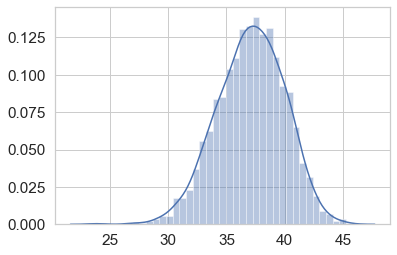

In [122]:
sns.distplot(df['r'].tolist())

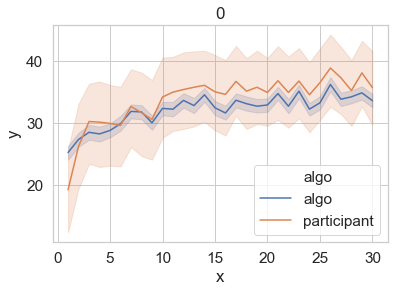

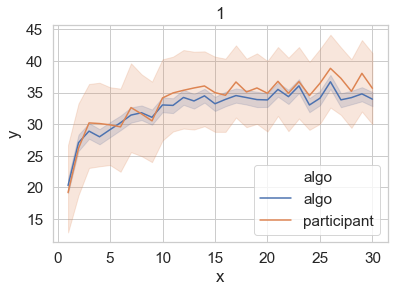

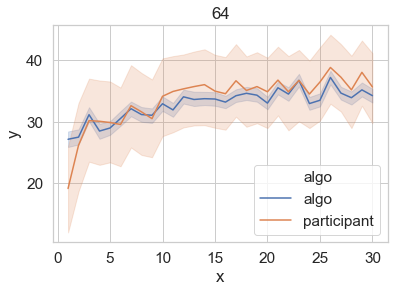

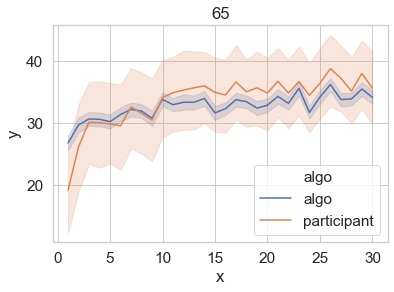

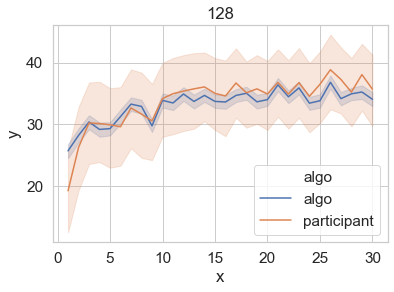

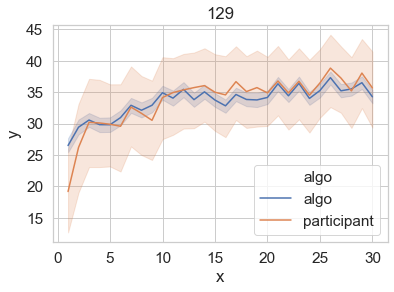

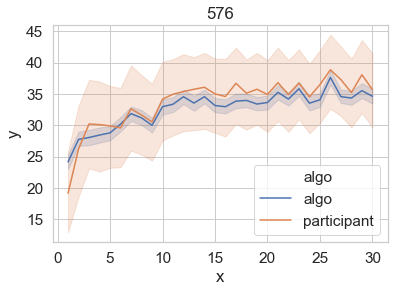

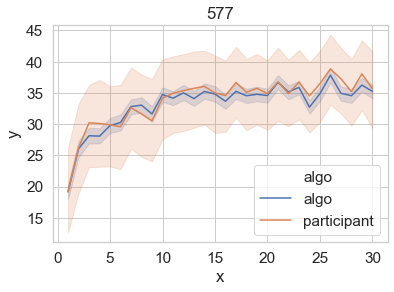

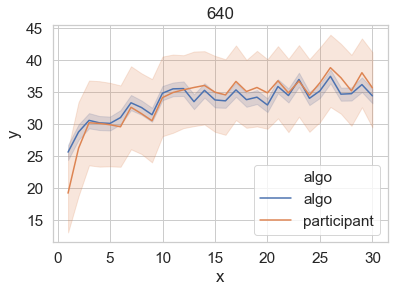

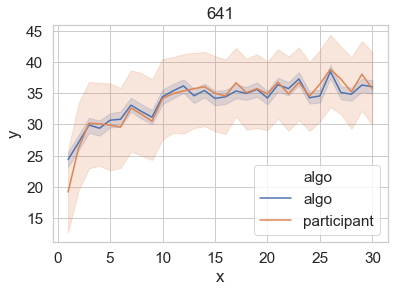

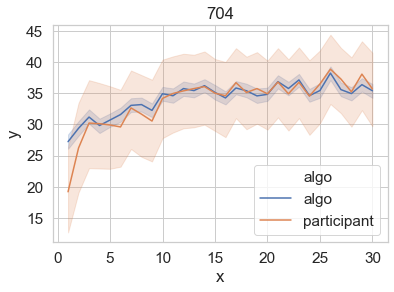

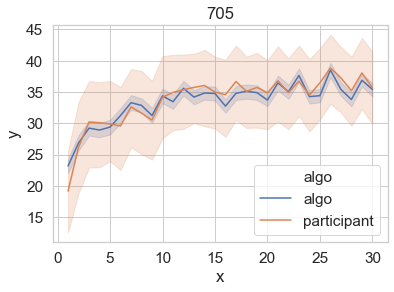

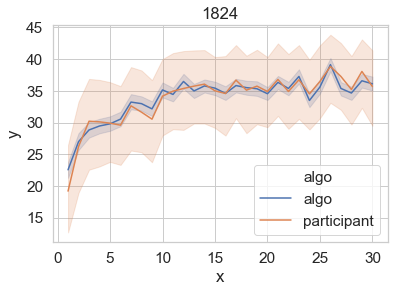

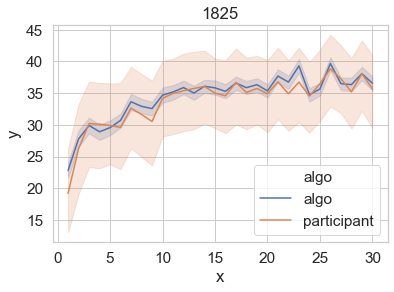

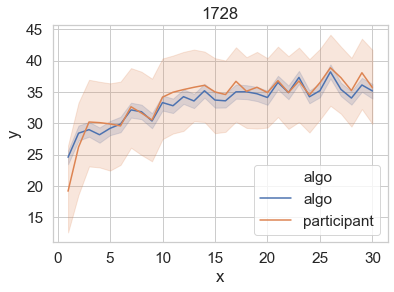

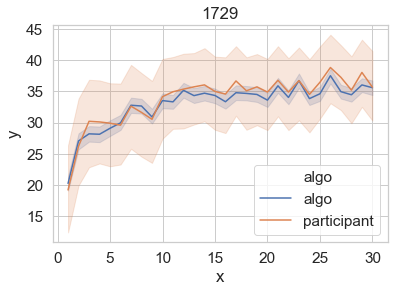

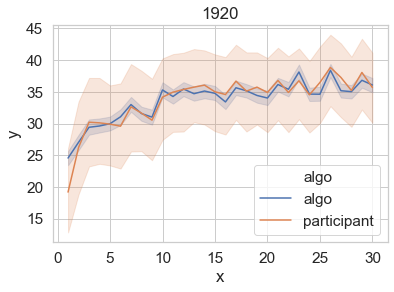

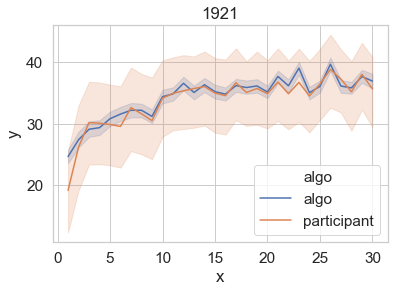

In [102]:
import pandas as pd
import seaborn as sns
import numpy as np
control_pids = [1, 2, 6, 9, 11, 14, 18, 21, 24, 27, 37, 38, 44, 50, 55, 56, 58, 66, 76, 79, 85, 89, 90, 98, 99,
                100, 104, 111, 113, 118, 119, 123, 126, 129, 139, 142, 144, 153, 154]
models = [0, 1, 64, 65, 128, 129, 576, 577, 640, 641, 704, 705, 1824, 1825, 1728, 1729, 1920, 1921]
create_dir("results/model_plots")
p_vals = []
m_vals = []
n_trials = 30
for model in models:
    data = pd.DataFrame()
    for pid in control_pids:
    #     for model in models:
        try:
            d = pickle_load(f"results/model_run_results/{pid}_mer_performance_error_{model}.pkl")
            data = data.append(d, ignore_index=True)
        except Exception as e:
            continue
    ax = sns.lineplot(x="x", y="y", hue = "algo", data=data)
    #plt.savefig(f"results/model_plots/{model}.png", bbox_inches='tight')
    plt.title(model)
    plt.show()

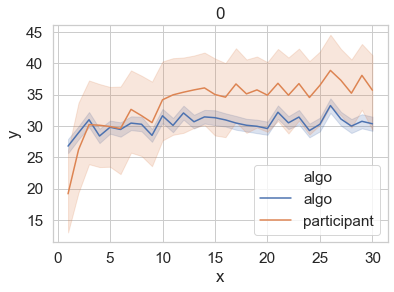

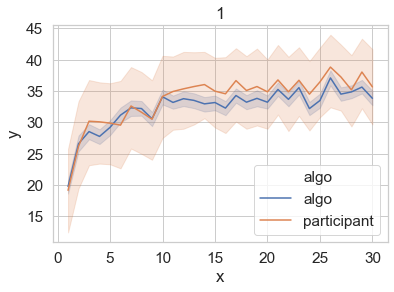

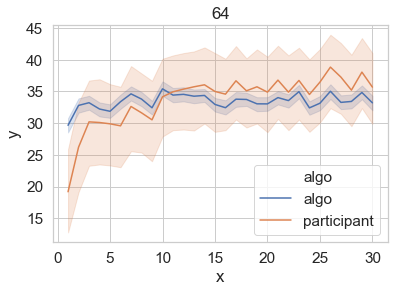

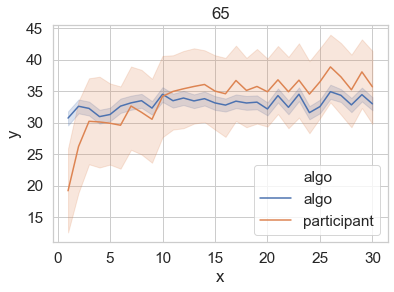

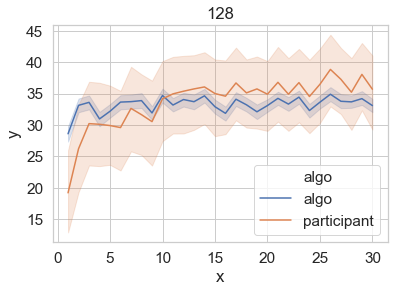

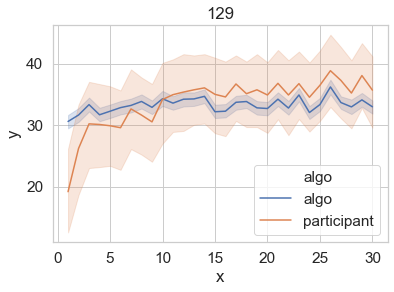

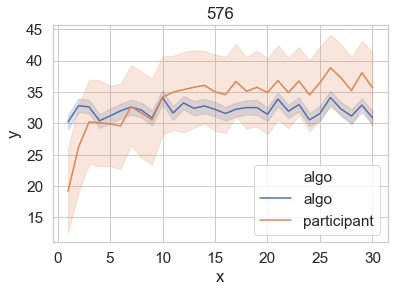

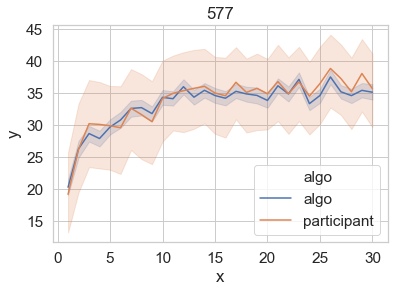

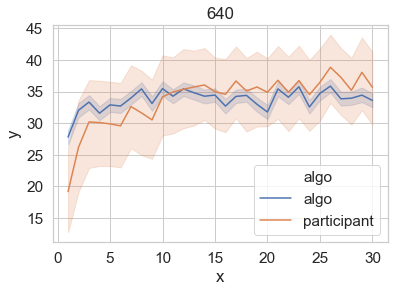

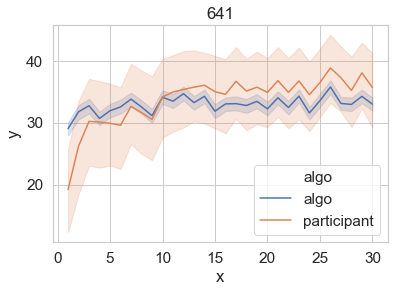

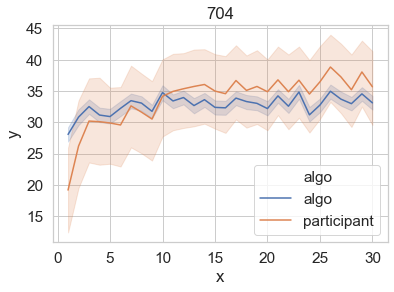

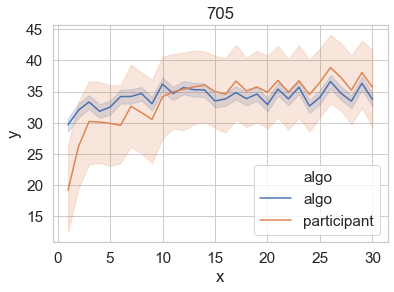

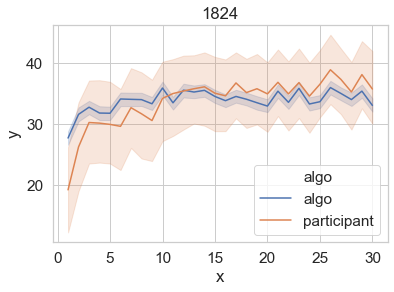

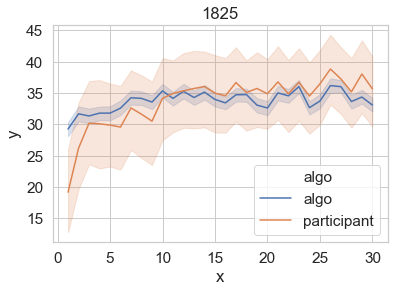

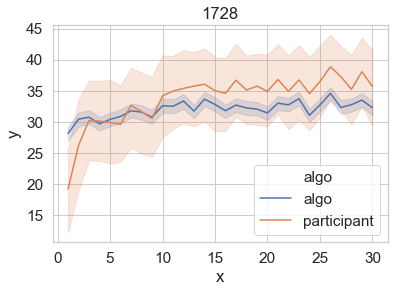

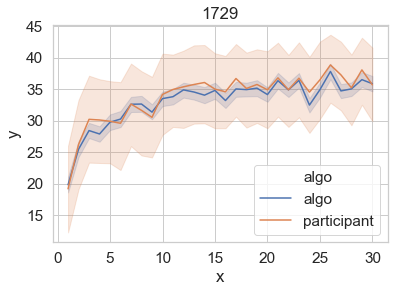

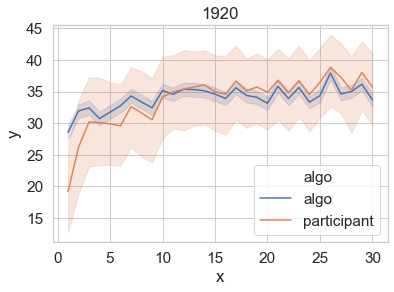

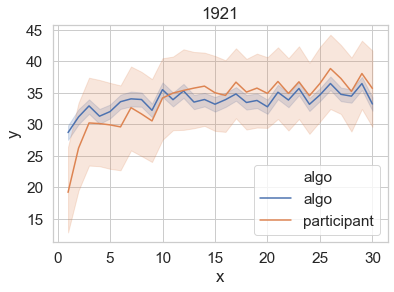

In [103]:
import pandas as pd
import seaborn as sns
import numpy as np
control_pids = [1, 2, 6, 9, 11, 14, 18, 21, 24, 27, 37, 38, 44, 50, 55, 56, 58, 66, 76, 79, 85, 89, 90, 98, 99,
                100, 104, 111, 113, 118, 119, 123, 126, 129, 139, 142, 144, 153, 154]
models = [0, 1, 64, 65, 128, 129, 576, 577, 640, 641, 704, 705, 1824, 1825, 1728, 1729, 1920, 1921]
create_dir("results/model_plots_microscope")
p_vals = []
m_vals = []
n_trials = 30
for model in models:
    data = pd.DataFrame()
    for pid in control_pids:
    #     for model in models:
        try:
            d = pickle_load(f"results/model_run_results_microscope/{pid}_mer_performance_error_{model}.pkl")
            data = data.append(d, ignore_index=True)
        except Exception as e:
            continue
    ax = sns.lineplot(x="x", y="y", hue = "algo", data=data)
    #plt.savefig(f"results/model_plots/{model}.png", bbox_inches='tight')
    plt.title(model)
    plt.show()

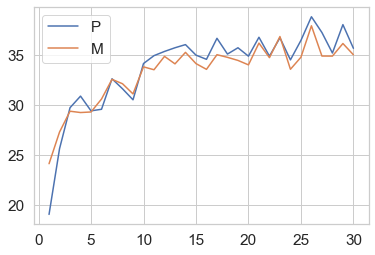

In [104]:
import pandas as pd
import seaborn as sns
import numpy as np
control_pids = [1, 2, 6, 9, 11, 14, 18, 21, 24, 27, 37, 38, 44, 50, 55, 56, 58, 66, 76, 79, 85, 89, 90, 98, 99,
                100, 104, 111, 113, 118, 119, 123, 126, 129, 139, 142, 144, 153, 154]
models = [0, 1, 64, 65, 128, 129, 576, 577, 640, 641, 704, 705, 1824, 1825, 1728, 1729, 1920, 1921]
create_dir("results/model_plots")
p_vals = []
m_vals = []
n_trials = 30
for i, pid in enumerate(control_pids):
    data = pd.DataFrame()
    m_data = {}
    diffs = []
    j = 0
    for model in models:
    #     for model in models:
        try:
            d = pickle_load(f"results/model_run_results/{pid}_mer_performance_error_{model}.pkl")
            data = data.append(d, ignore_index=True)
            mean_data = data.groupby(["algo", "x"]).mean()
            square = list(map(lambda x, y: (x-y)**2, mean_data['y']['algo'], mean_data['y']['participant']))
            p_val = mean_data['y']['participant'].values
            diff = np.sqrt(np.sum(square))
            diffs.append(diff)
            m_data[j] = mean_data
            j+=1
        except Exception as e:
            continue
    m_val = m_data[np.argmin(diffs)]["y"]["algo"].values
    if len(p_val) == n_trials and len(m_val) == n_trials:
        p_vals.append(p_val)
        m_vals.append(m_val)
#ax = sns.lineplot(x="x", y="y", hue = "algo", data=data)
plt.plot(range(1, len(p_val)+1), np.mean(p_vals, axis=0), label = "P") 
plt.plot(range(1, len(p_val)+1), np.mean(m_vals, axis=0), label = "M") 
plt.legend()
#plt.savefig(f"results/model_plots/{model}.png", bbox_inches='tight')
plt.show()

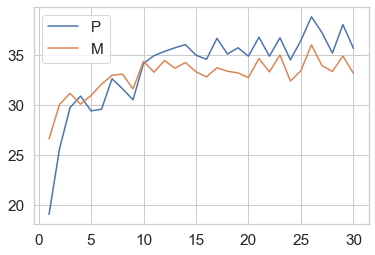

In [105]:
import pandas as pd
import seaborn as sns
import numpy as np
control_pids = [1, 2, 6, 9, 11, 14, 18, 21, 24, 27, 37, 38, 44, 50, 55, 56, 58, 66, 76, 79, 85, 89, 90, 98, 99,
                100, 104, 111, 113, 118, 119, 123, 126, 129, 139, 142, 144, 153, 154]
models = [0, 1, 64, 65, 128, 129, 576, 577, 640, 641, 704, 705, 1824, 1825, 1728, 1729, 1920, 1921]
create_dir("results/model_plots_microscope")
p_vals = []
m_vals = []
n_trials = 30
for i, pid in enumerate(control_pids):
    data = pd.DataFrame()
    m_data = {}
    diffs = []
    j = 0
    for model in models:
    #     for model in models:
        try:
            d = pickle_load(f"results/model_run_results_microscope/{pid}_mer_performance_error_{model}.pkl")
            data = data.append(d, ignore_index=True)
            mean_data = data.groupby(["algo", "x"]).mean()
            square = list(map(lambda x, y: (x-y)**2, mean_data['y']['algo'], mean_data['y']['participant']))
            p_val = mean_data['y']['participant'].values
            diff = np.sqrt(np.sum(square))
            diffs.append(diff)
            m_data[j] = mean_data
            j+=1
        except Exception as e:
            continue
    m_val = m_data[np.argmin(diffs)]["y"]["algo"].values
    if len(p_val) == n_trials and len(m_val) == n_trials:
        p_vals.append(p_val)
        m_vals.append(m_val)
#ax = sns.lineplot(x="x", y="y", hue = "algo", data=data)
plt.plot(range(1, len(p_val)+1), np.mean(p_vals, axis=0), label = "P") 
plt.plot(range(1, len(p_val)+1), np.mean(m_vals, axis=0), label = "M") 
plt.legend()
#plt.savefig(f"results/model_plots/{model}.png", bbox_inches='tight')
plt.show()

In [ ]:
num_models = 3500
models = pd.read_csv("rl_models.csv")
rewards = []
for model_num in range(num_models):
    try:
        r = pickle_load(f"results/model_rewards/{model_num}.pkl")
#         if r < 30:
#             print(models.iloc[model_num].values, r)
        if r > 40:
            print(models.iloc[model_num].values, r)
        rewards.append(r)
    except:
        #print(models.iloc[model_num].values)
        continue
plt.hist(rewards)

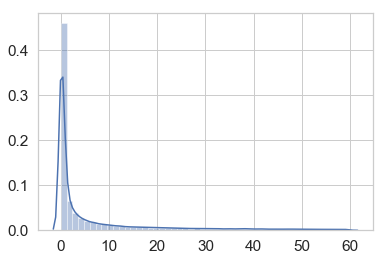

In [126]:
from scipy.stats import loguniform
import numpy as np
import seaborn as sns
x = loguniform(0.01, 60)
rvs = x.rvs(100000)
sns.distplot(rvs)

In [86]:
num_p = 200
strategies = {}
temperatures = {}
for pid in range(num_p):
    try:
        S = pickle_load(f"results/final_strategy_inferences/v1.0_participant/{pid}_strategies.pkl")
        T = pickle_load(f"results/final_strategy_inferences/v1.0_participant/{pid}_temperatures.pkl")
        strategies[pid] = S
        temperatures[pid] = T
    except:
        continue
print(strategies, temperatures)
pickle_save(strategies, "results/final_strategy_inferences/v1.0_participant_strategies.pkl")
pickle_save(temperatures, "results/final_strategy_inferences/v1.0_participant_temperatures.pkl")

{0: [43, 43, 43, 43, 17, 67, 67, 43, 67, 42, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21], 1: [64, 64, 64, 64, 64, 64, 64, 64, 64, 63, 64, 64, 64, 64, 64, 64, 64, 64, 57, 57], 2: [23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22], 3: [23, 30, 23, 23, 23, 23, 23, 23, 23, 39, 39, 21, 21, 21, 21, 21, 21, 21, 21, 21], 4: [21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21], 5: [21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21], 6: [18, 18, 18, 18, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67, 67], 8: [30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30], 9: [17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 17], 10: [21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 17, 17, 17, 17, 17], 11: [21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21], 12: [21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 2

In [51]:
columns = ['model', 'decision_rule', 'use_pseudo_rewards', 'pr_weight', 'actor', 'term', 'selector', 'learner', 
            'strategy_space_type', 'stochastic_updating', 'subjective_cost', 'vicarious_learning', 'termination_value_known',
          'montecarlo_updates', 'is_null', 'is_gaussian', 'bandit_prior', 'prior']

In [103]:
# Hierarchical Learner
models =  ["hierarchical_learner"]
decision_rules = ["adaptive_satisficing", "threshold", "confidence_bound"]
prs = [True, False]
prws = [True, False]
actors = ["lvoc", "reinforce", "baseline_reinforce"]
term = [True, False]
selectors = [None]
learners = [None]
strategy_space_types = [None]
stochastic_updates = [None]
subjective_cost = [True, False]
vicarious_learning = [True, False]
termination_value_known = [True, False]
montecarlo_updates = [True, False]
is_null = [True, False]
is_gaussian = [None]
bandit_prior = [None]
priors = ["strategy_weight"]
ls = list(itertools.product(models, decision_rules, prs, prws, actors, term, selectors, learners, strategy_space_types, stochastic_updates,
                      subjective_cost, vicarious_learning, termination_value_known, montecarlo_updates, is_null, is_gaussian,
                      bandit_prior, priors))

In [104]:
print(len(ls))

2304


In [105]:
# LVOC, REINFORCE and Baseline REINFORCE
models =  ["lvoc", "reinforce", "baseline_reinforce"]
decision_rules = [None]
prs = [True, False]
prws = [True, False]
actors = [None]
term = [True]
selectors = [None]
learners = [None]
strategy_space_types = [None]
stochastic_updates = [None]
subjective_cost = [True, False]
vicarious_learning = [True, False]
termination_value_known = [True, False]
montecarlo_updates = [True, False]
is_null = [True, False]
is_gaussian = [None]
bandit_prior = [None]
priors = ["strategy_weight"]
ls += list(itertools.product(models, decision_rules, prs, prws, actors, term, selectors, learners, strategy_space_types, stochastic_updates,
                      subjective_cost, vicarious_learning, termination_value_known, montecarlo_updates, is_null, is_gaussian,
                      bandit_prior, priors))

In [106]:
print(len(ls))

2688


In [107]:
models =  ["rssl"]
decision_rules = [None]
prs = [True, False]
prws = [True, False]
actors = [None]
term = [None]
selectors = [None]
learners = [None]
strategy_space_types = ['microscope', 'participant']
stochastic_updates = [True, False]
subjective_cost = [None]
vicarious_learning = [None]
termination_value_known = [None]
montecarlo_updates = [None]
is_null = [True, False]
is_gaussian = [True, False]
bandit_prior = [None]
priors = ["bernoulli_prior", "gaussian_prior"] # Remove gaussian prior from bernoulli and bernoulli from gaussian
ls += list(itertools.product(models, decision_rules, prs, prws, actors, term, selectors, learners, strategy_space_types, stochastic_updates,
                      subjective_cost, vicarious_learning, termination_value_known, montecarlo_updates, is_null, is_gaussian,
                      bandit_prior, priors))
print(len(ls))

2816


In [108]:
models =  ["sdss"]
decision_rules = [None]
prs = [True, False]
prws = [True, False]
actors = [None]
term = [True]
selectors = ["rssl"]
learners = ["lvoc", "reinforce", "baseline_reinforce"]
strategy_space_types = [None]
stochastic_updates = [True, False]
subjective_cost = [True, False]
vicarious_learning = [True, False]
termination_value_known = [True, False]
montecarlo_updates = [True, False]
is_null = [True, False]
is_gaussian = [True, False]
bandit_prior = [True]
priors = ["strategy_weight"]
ls += list(itertools.product(models, decision_rules, prs, prws, actors, term, selectors, learners, strategy_space_types, stochastic_updates,
                      subjective_cost, vicarious_learning, termination_value_known, montecarlo_updates, is_null, is_gaussian,
                      bandit_prior, priors))
print(len(ls))

4352


In [109]:
import pandas as pd
df = pd.DataFrame(ls, columns = columns)

In [110]:
temp_df = df[df.is_gaussian == True][df.prior == "bernoulli_prior"].index
temp2_df = df[df.is_gaussian == False][df.prior == "gaussian_prior"].index

/anaconda3/envs/cogtut/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/anaconda3/envs/cogtut/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [111]:
inds = temp_df.tolist() + temp2_df.tolist()
df.drop(inds, axis=0, inplace=True)

In [112]:
temp3 = df[(df.use_pseudo_rewards == False) & (df.pr_weight == True)]
print(temp3.index.tolist())
df.drop(temp3.index.tolist(), axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)

[384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 565, 566, 567, 568, 569, 570, 571, 572, 573, 574, 575, 1152, 1153, 1154, 1155, 1156, 1157, 115

In [113]:
print(len(df))

3216


In [114]:
df.to_csv("rl_models.csv")